<a href="https://colab.research.google.com/github/anjana-c-maker/FAKE_NEWS_DETECOR/blob/main/Fake_News_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from gensim.models import Word2Vec
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [3]:
# Load data
fake_df = pd.read_csv("/content/drive/MyDrive/Fake_News_Project/Fake.csv")
true_df = pd.read_csv("/content/drive/MyDrive/Fake_News_Project/True.csv")


In [4]:
#Dataset deatils
fake_df.info()
fake_df.shape

true_df.info()
true_df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


(21417, 4)

In [5]:
#Dataset deatils
true_df.head()


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [6]:
#label and merge datasets
fake_df['label'] = 0
true_df['label'] = 1

data = pd.concat([fake_df, true_df], ignore_index=True)

In [7]:
fake_df.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [9]:

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
# Function to clean text
def clean_text(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Keep only letters
    text = text.lower().split()  # Lowercase and tokenize
    text = [word for word in text if word not in stop_words]  # Remove stopwords
    return " ".join(text)

# Apply cleaning
data["text"] = data["text"].apply(clean_text)


In [11]:
# Tokenization
tokenizer = Tokenizer(num_words=5000)  # Use top 5000 words
tokenizer.fit_on_texts(data["text"])
X = tokenizer.texts_to_sequences(data["text"])
X = pad_sequences(X, maxlen=200)  # Standardize input size

In [12]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, data["label"], test_size=0.2, random_state=42)


In [15]:
# Build simple LSTM model
model = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=200),
    LSTM(64, dropout=0.2),
    Dense(1, activation="sigmoid")
])

In [16]:
# Compile model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train model
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))




Epoch 1/5
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 170s 148ms/step - accuracy: 0.9169 - loss: 0.1907 - val_accuracy: 0.9851 - val_loss: 0.0551
Epoch 2/5
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 199s 146ms/step - accuracy: 0.9872 - loss: 0.0421 - val_accuracy: 0.9823 - val_loss: 0.0624
Epoch 3/5
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 203s 147ms/step - accuracy: 0.9875 - loss: 0.0401 - val_accuracy: 0.9831 - val_loss: 0.0535
Epoch 4/5
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 204s 149ms/step - accuracy: 0.9894 - loss: 0.0343 - val_accuracy: 0.9893 - val_loss: 0.0424
Epoch 5/5
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 166s 148ms/step - accuracy: 0.9924 - loss: 0.0254 - val_accuracy: 0.9839 - val_loss: 0.0523


In [17]:
# Evaluate model
y_pred = (model.predict(X_test) > 0.5).astype(int)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

281/281 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step
Accuracy: 0.9839


281/281 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step
Confusion Matrix:
[[4685   48]
 [  97 4150]]


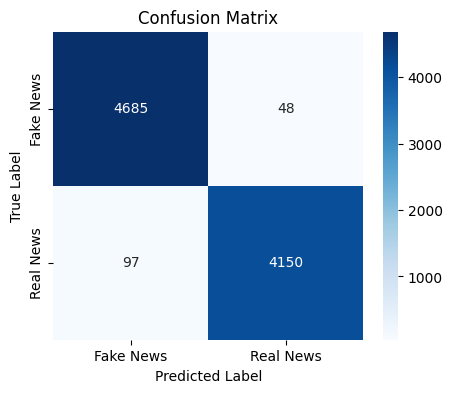


Classification Report:
              precision    recall  f1-score   support

   Fake News       0.98      0.99      0.98      4733
   Real News       0.99      0.98      0.98      4247

    accuracy                           0.98      8980
   macro avg       0.98      0.98      0.98      8980
weighted avg       0.98      0.98      0.98      8980



In [19]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Get predictions on the test set
y_pred_probs = model.predict(X_test)  # Get probability scores
y_pred = (y_pred_probs > 0.5).astype(int)  # Convert to binary 0 or 1

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix as numbers
print("Confusion Matrix:")
print(cm)

# Visualize confusion matrix with a heatmap
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Fake News", "Real News"], yticklabels=["Fake News", "Real News"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Fake News", "Real News"]))


# **FAKE NEWS DETECTOR**

In [20]:
def predict_news(article):
    # Clean and preprocess input
    article = clean_text(article)
    article_seq = tokenizer.texts_to_sequences([article])
    article_padded = pad_sequences(article_seq, maxlen=200)

    # Get prediction
    prediction = model.predict(article_padded)[0][0]

    # Print result
    if prediction > 0.5:
        print("🟢 Real News")
    else:
        print("🔴 Fake News")

# Test a new article
predict_news("Scientists confirm climate change is not real, says anonymous source")
predict_news("NASA announces successful landing on Mars with new rover")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
🔴 Fake News
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
🔴 Fake News
